## Assignment 2
### Importing Libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

### Getting the Dataset 
##### We are going to work on the Titanic Data set imported from ../Datasets/titanic.csv ; if you dont have it download it from https://www.kaggle.com/competitions/titanic/data?select=test.csv

In [2]:
df = pd.read_csv("../Datasets/titanic.csv")

##### print the data to check if the data imported properly
###### Data dimension -

In [3]:
df.shape

(891, 12)

###### Data Size -

In [4]:
df.size

10692

###### Description of the data frame -

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### Data types of different columns -

In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

###### printing first 5 rows -

In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Checking of NULL values

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Checking of duplicate values

In [9]:
df.duplicated().sum()

0

### Data Wrangling
#### Removing the Cabin Column as its irrelevenat and had too much missing data

In [10]:
df.drop(columns=['Cabin'],inplace = True)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

#### Filling the age with average value 

In [12]:
df['Age'].fillna(df['Age'].mean(),inplace= True)

#### Removing the values with NA 

In [13]:
df.dropna(inplace=True)

### Clean Data

In [14]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### Checking for outliers

#### Using Z-Score
#### z_score = (value-mean)/standard_deviation
##### The Z-score method measures how many standard deviations a data point is from the mean. Typically, values beyond a certain threshold (often 2 or 3 standard deviations) are considered outliers.

In [15]:
z_score = stats.zscore(df['Age'])
print(z_score)

0     -0.590495
1      0.643971
2     -0.281878
3      0.412509
4      0.412509
         ...   
886   -0.204724
887   -0.821957
888    0.003524
889   -0.281878
890    0.181046
Name: Age, Length: 889, dtype: float64


##### Now let the threshold be 3 and lets find the indices which are above 3

In [16]:
threshold = 3 
outliner_indice = np.where(np.abs(z_score) > threshold)[0]
print(outliner_indice)

[ 95 115 492 629 671 744 849]


##### Retriving the data from the indices which were outliners
###### The [0] at the end extracts the indices from the tuple returned by np.where.

In [17]:
outliners = df['Age'].iloc[outliner_indice]
print(outliners)

96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


#### Plotting of Outliers

<AxesSubplot:>

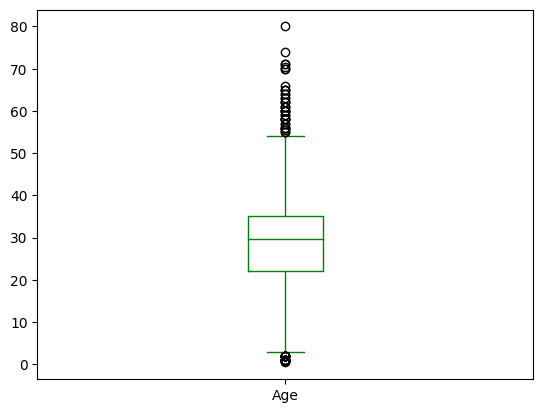

In [29]:
df.plot(kind = 'box' , x = 'PassengerId' , y = 'Age' ,color = 'green')

#### Using IOR
##### To find the interquartile range (IQR), ​first find the median (middle value) of the lower and upper half of the data. These values are quartile 1 (Q1) and quartile 3 (Q3). The IQR is the difference between Q3 and Q1

In [33]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

13.0


##### Calculate the lower and upper bound for the outliers

In [40]:
lower_bound = Q1 - ( 1.5 * IQR )
upper_bound = Q3 + ( 1.5 * IQR )

##### Remove the indices which lie below the lower bound and the values which lie above the upper bound 

In [47]:
outlier_indices = np.where((df['Age'] > upper_bound)|(df['Age'] < lower_bound) )[0]
print(outlier_indices)

[  7  11  15  16  33  54  77  93  95 115 118 151 163 169 171 173 182 194
 204 231 251 267 274 279 296 304 325 339 365 380 385 437 455 466 468 478
 482 486 491 492 529 544 554 569 586 624 625 629 641 643 646 658 671 683
 693 744 754 771 787 802 823 826 829 849 877]


##### Printing of all the outlier values 

In [48]:
outliners = df['Age'].iloc[outlier_indices]
print(outliners)

7       2.00
11     58.00
15     55.00
16      2.00
33     66.00
       ...  
824     2.00
827     1.00
831     0.83
851    74.00
879    56.00
Name: Age, Length: 65, dtype: float64
